In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/Tim/PycharmProjects/HOI/')

In [3]:
import sys
sys.path

['/Users/tim/PycharmProjects/HOI/examples',
 '/Users/tim/opt/anaconda3/lib/python39.zip',
 '/Users/tim/opt/anaconda3/lib/python3.9',
 '/Users/tim/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/Tim/PycharmProjects/HOI/']

In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import trange, tqdm

In [5]:
from synthetic_data import make_iid_example, make_iid_example_4way
from HOI.preprocessings import compute_kernel
from HOI.tests import test_independence

In [6]:
from HOI.statistics import compute_dHSIC_statistics

In [7]:
import matplotlib.pyplot as plt

# power

In [55]:
# df = make_iid_example('higher-order', s = 0.5, n_sample=300)
# data_dict, kernel_dict = compute_kernel(df)
# stat, cv, pval, reject = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']],
#                                  [data_dict['d1'], data_dict['d2'], data_dict['d3']],
#                                   mode = 'iid', n_perms=5000, alpha=0.05)
# print(stat, cv, pval, reject)

In [22]:

def plot_test(data, mode):
    x = np.arange(0.1, 1, 0.1)
    y = np.array(data)

    fig = plt.figure(dpi=800)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode + ' of dHSIC independence tests')
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

In [10]:
# power calculation for higher-order data
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example('higher-order', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, reject = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']],
                                         [data_dict['d1'], data_dict['d2'], data_dict['d3']],
                                          mode = 'iid', n_perms=2000, alpha=0.05)
        rejects = rejects + reject
    power[str(d)] = rejects/100

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
power1 = {'0.1': 0.12,
 '0.2': 0.18,
 '0.3': 0.33,
 '0.4': 0.75,
 '0.5': 1.0,
 '0.6': 1.0,
 '0.7': 1.0,
 '0.8': 1.0,
 '0.9': 1.0}

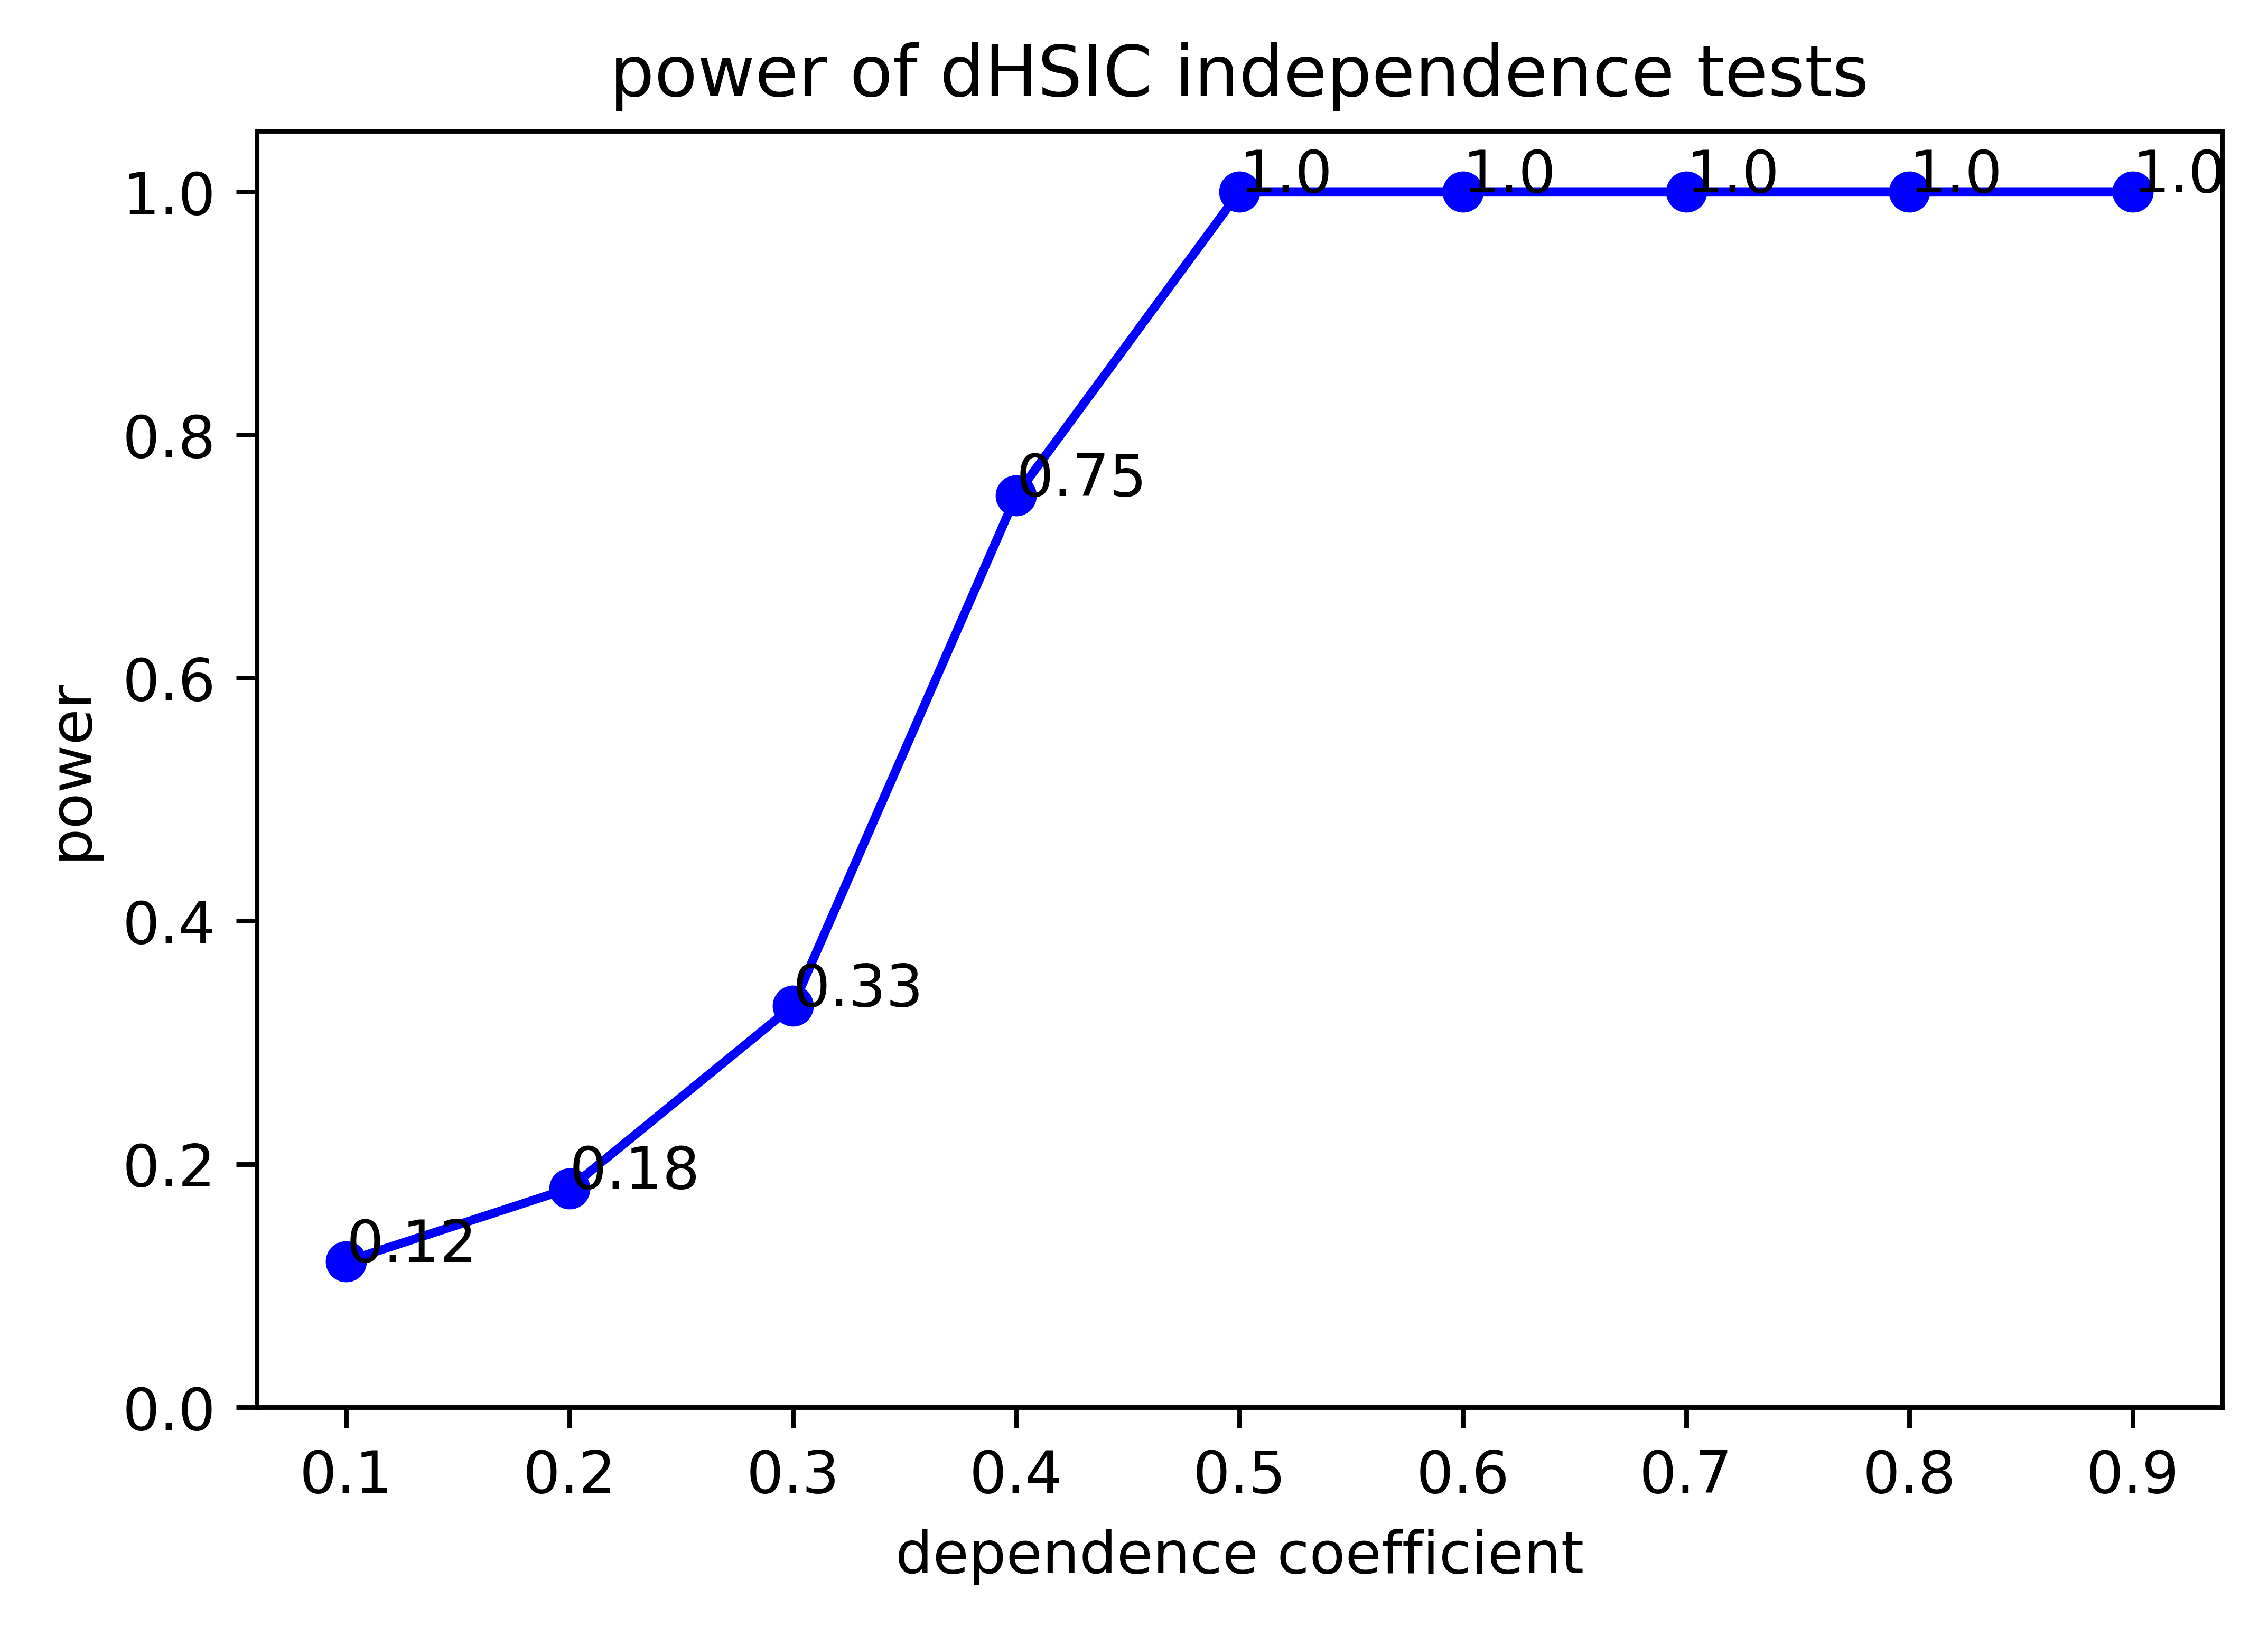

In [24]:
plot_test(list(power1.values()), 'power')

In [12]:
# power calculation for multi-normal data
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='multi-normal', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, reject1 = test_independence([kernel_dict['d1'], kernel_dict['d2']],
                                         [data_dict['d1'], data_dict['d2']],
                                          mode = 'iid', n_perms=2000, alpha=0.05)
        
        _, _, reject2 = test_independence([kernel_dict['d1'], kernel_dict['d3']],
                                 [data_dict['d1'], data_dict['d3']],
                                  mode = 'iid', n_perms=2000, alpha=0.05)

        _, _, reject3 = test_independence([kernel_dict['d2'], kernel_dict['d3']],
                             [data_dict['d2'], data_dict['d3']],
                              mode = 'iid', n_perms=2000, alpha=0.05)
        
        rejects = rejects + reject1+reject2+reject3
    power[str(d)] = rejects/300

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [25]:
power2 = {'0.1': 0.25,
 '0.2': 0.73,
 '0.3': 0.99,
 '0.4': 1.0,
 '0.5': 1.0,
 '0.6': 1.0,
 '0.7': 1.0,
 '0.8': 1.0,
 '0.9': 1.0}

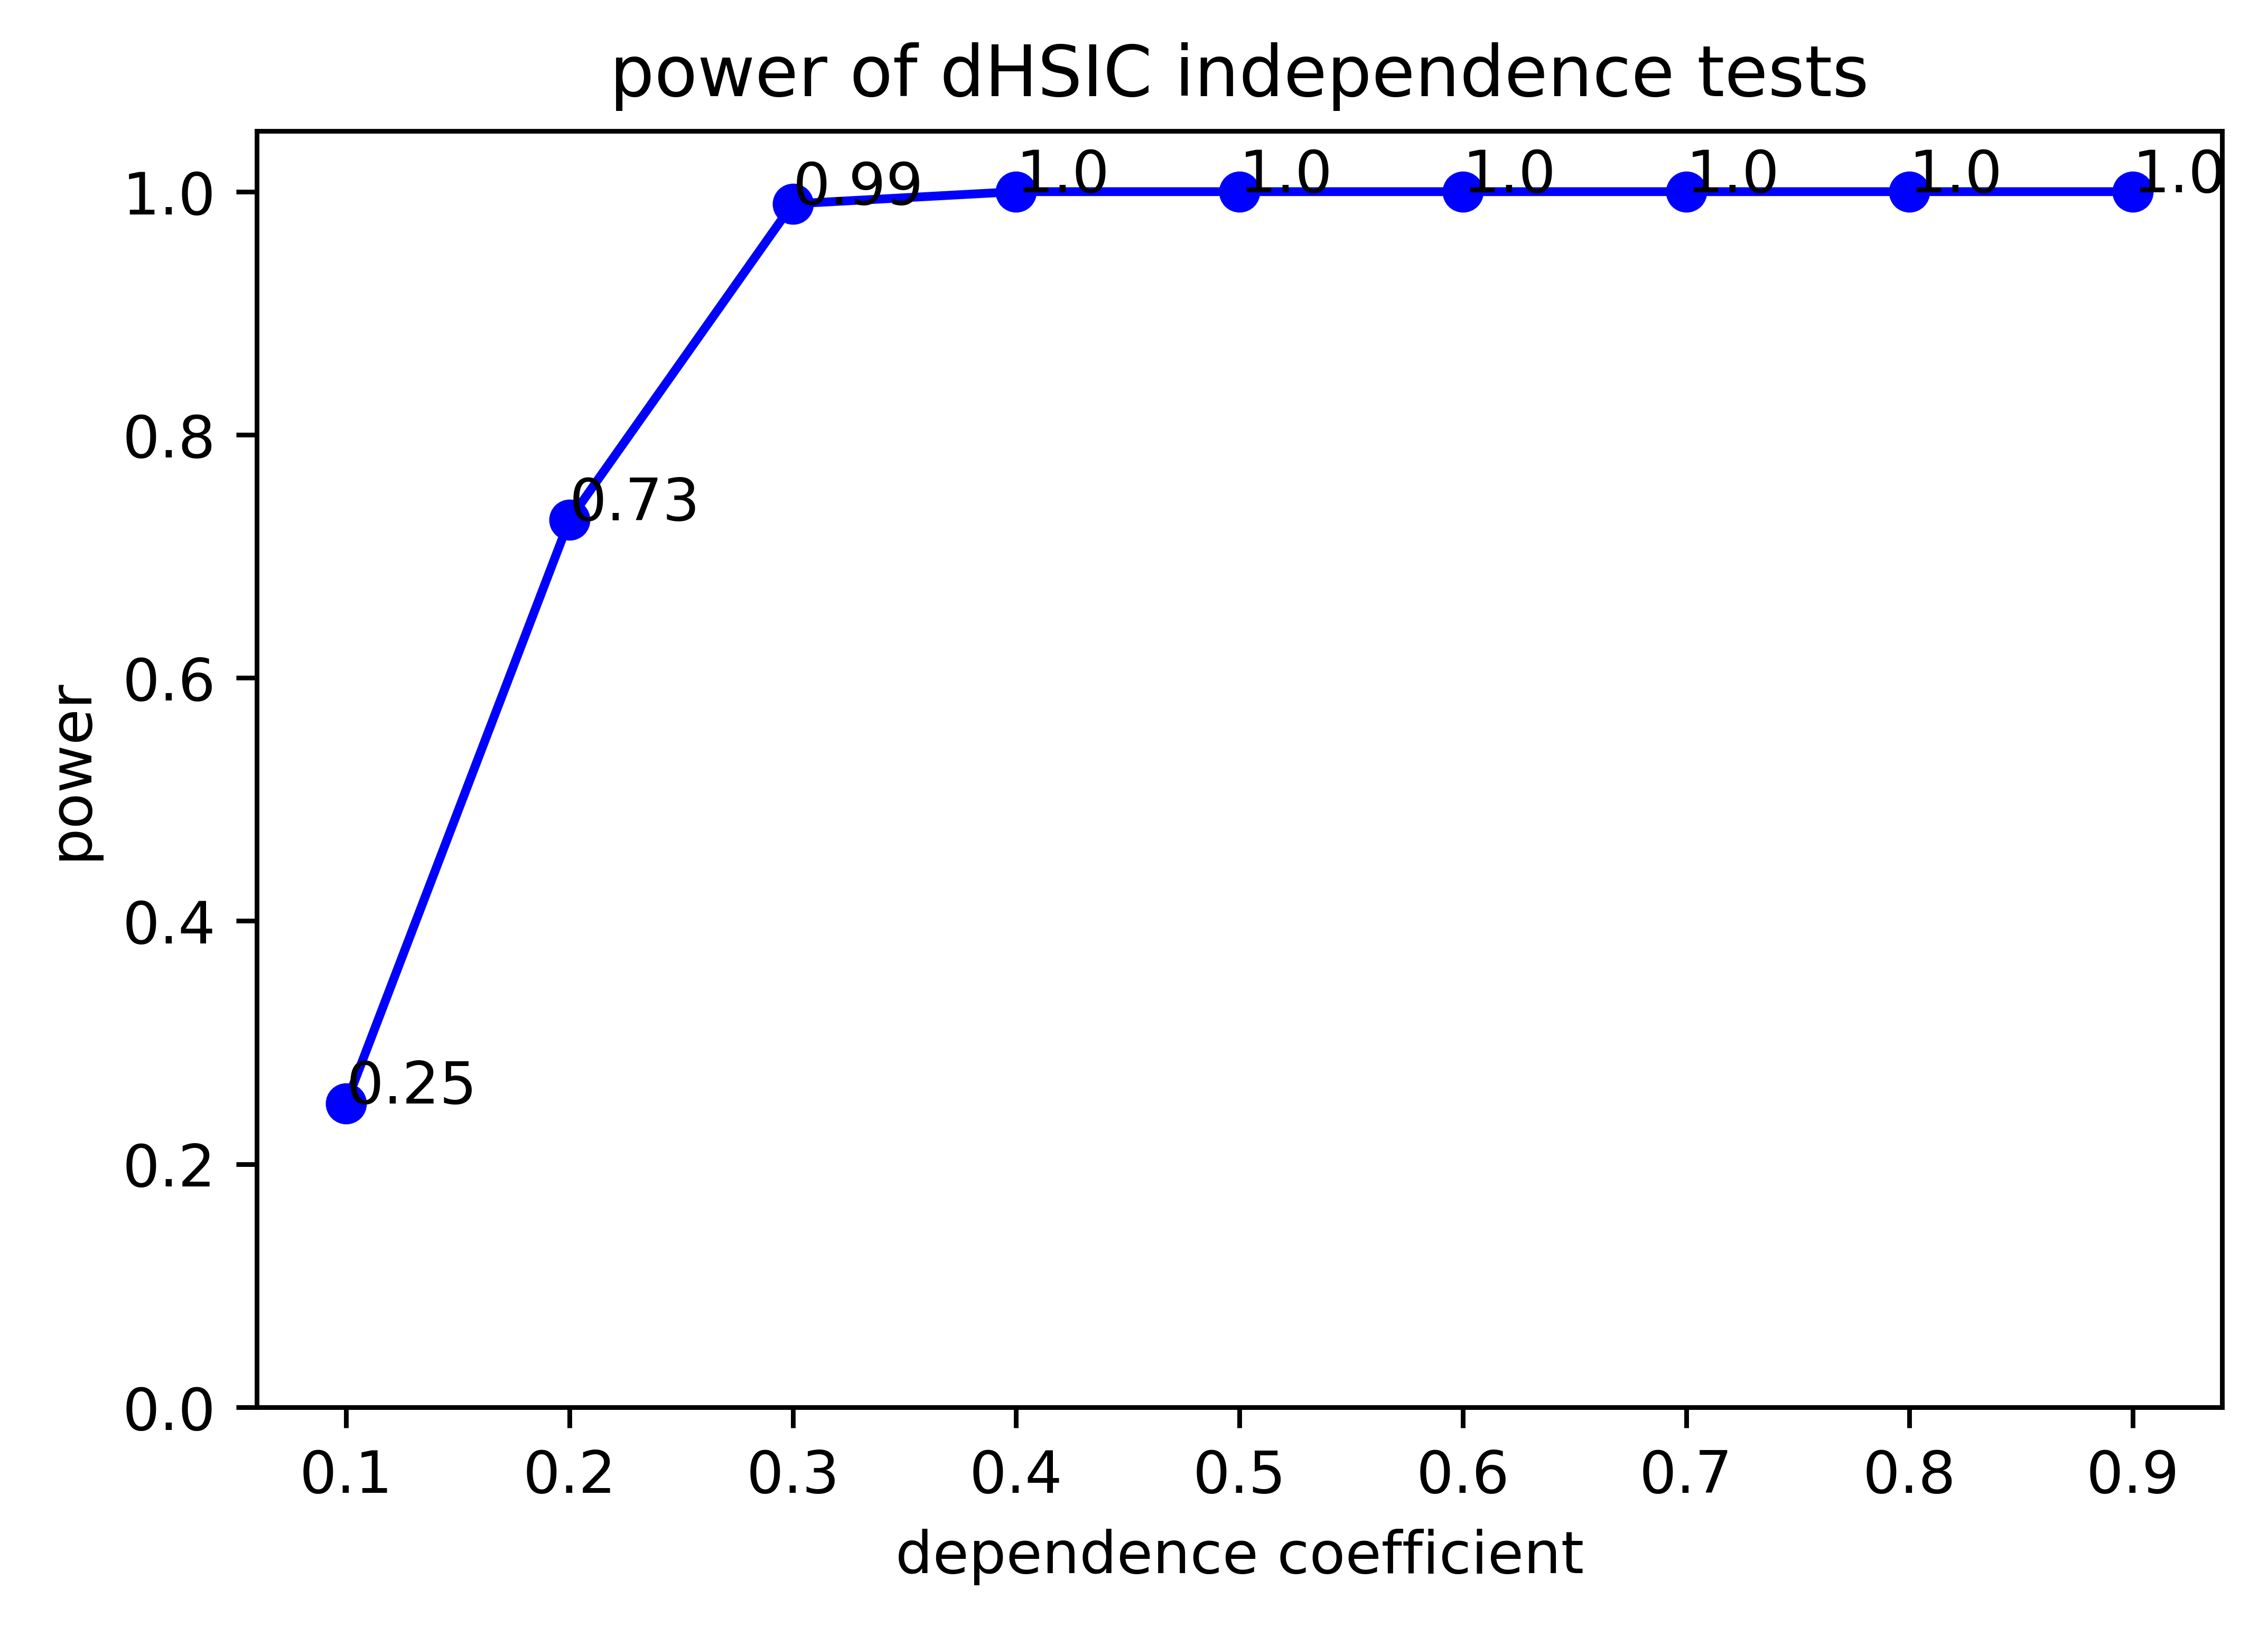

In [26]:
plot_test(list(power2.values()), 'power')

In [14]:
# power calculation for interpolated data
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='interpolated', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, reject1 = test_independence([kernel_dict['d1'], kernel_dict['d2']],
                                         [data_dict['d1'], data_dict['d2']],
                                          mode = 'iid', n_perms=2000, alpha=0.05)
        
        _, _, reject2 = test_independence([kernel_dict['d1'], kernel_dict['d3']],
                                         [data_dict['d1'], data_dict['d3']],
                                          mode = 'iid', n_perms=2000, alpha=0.05)

        _, _, reject3 = test_independence([kernel_dict['d2'], kernel_dict['d3']],
                                         [data_dict['d2'], data_dict['d3']],
                                          mode = 'iid', n_perms=2000, alpha=0.05)
        
        rejects = rejects + reject1 + reject2 + reject3
    power[str(d)] = rejects/300

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [27]:
power3 = {'0.1': 0.08,
 '0.2': 0.12,
 '0.3': 0.51,
 '0.4': 1.0,
 '0.5': 1.0,
 '0.6': 1.0,
 '0.7': 1.0,
 '0.8': 1.0,
 '0.9': 1.0}

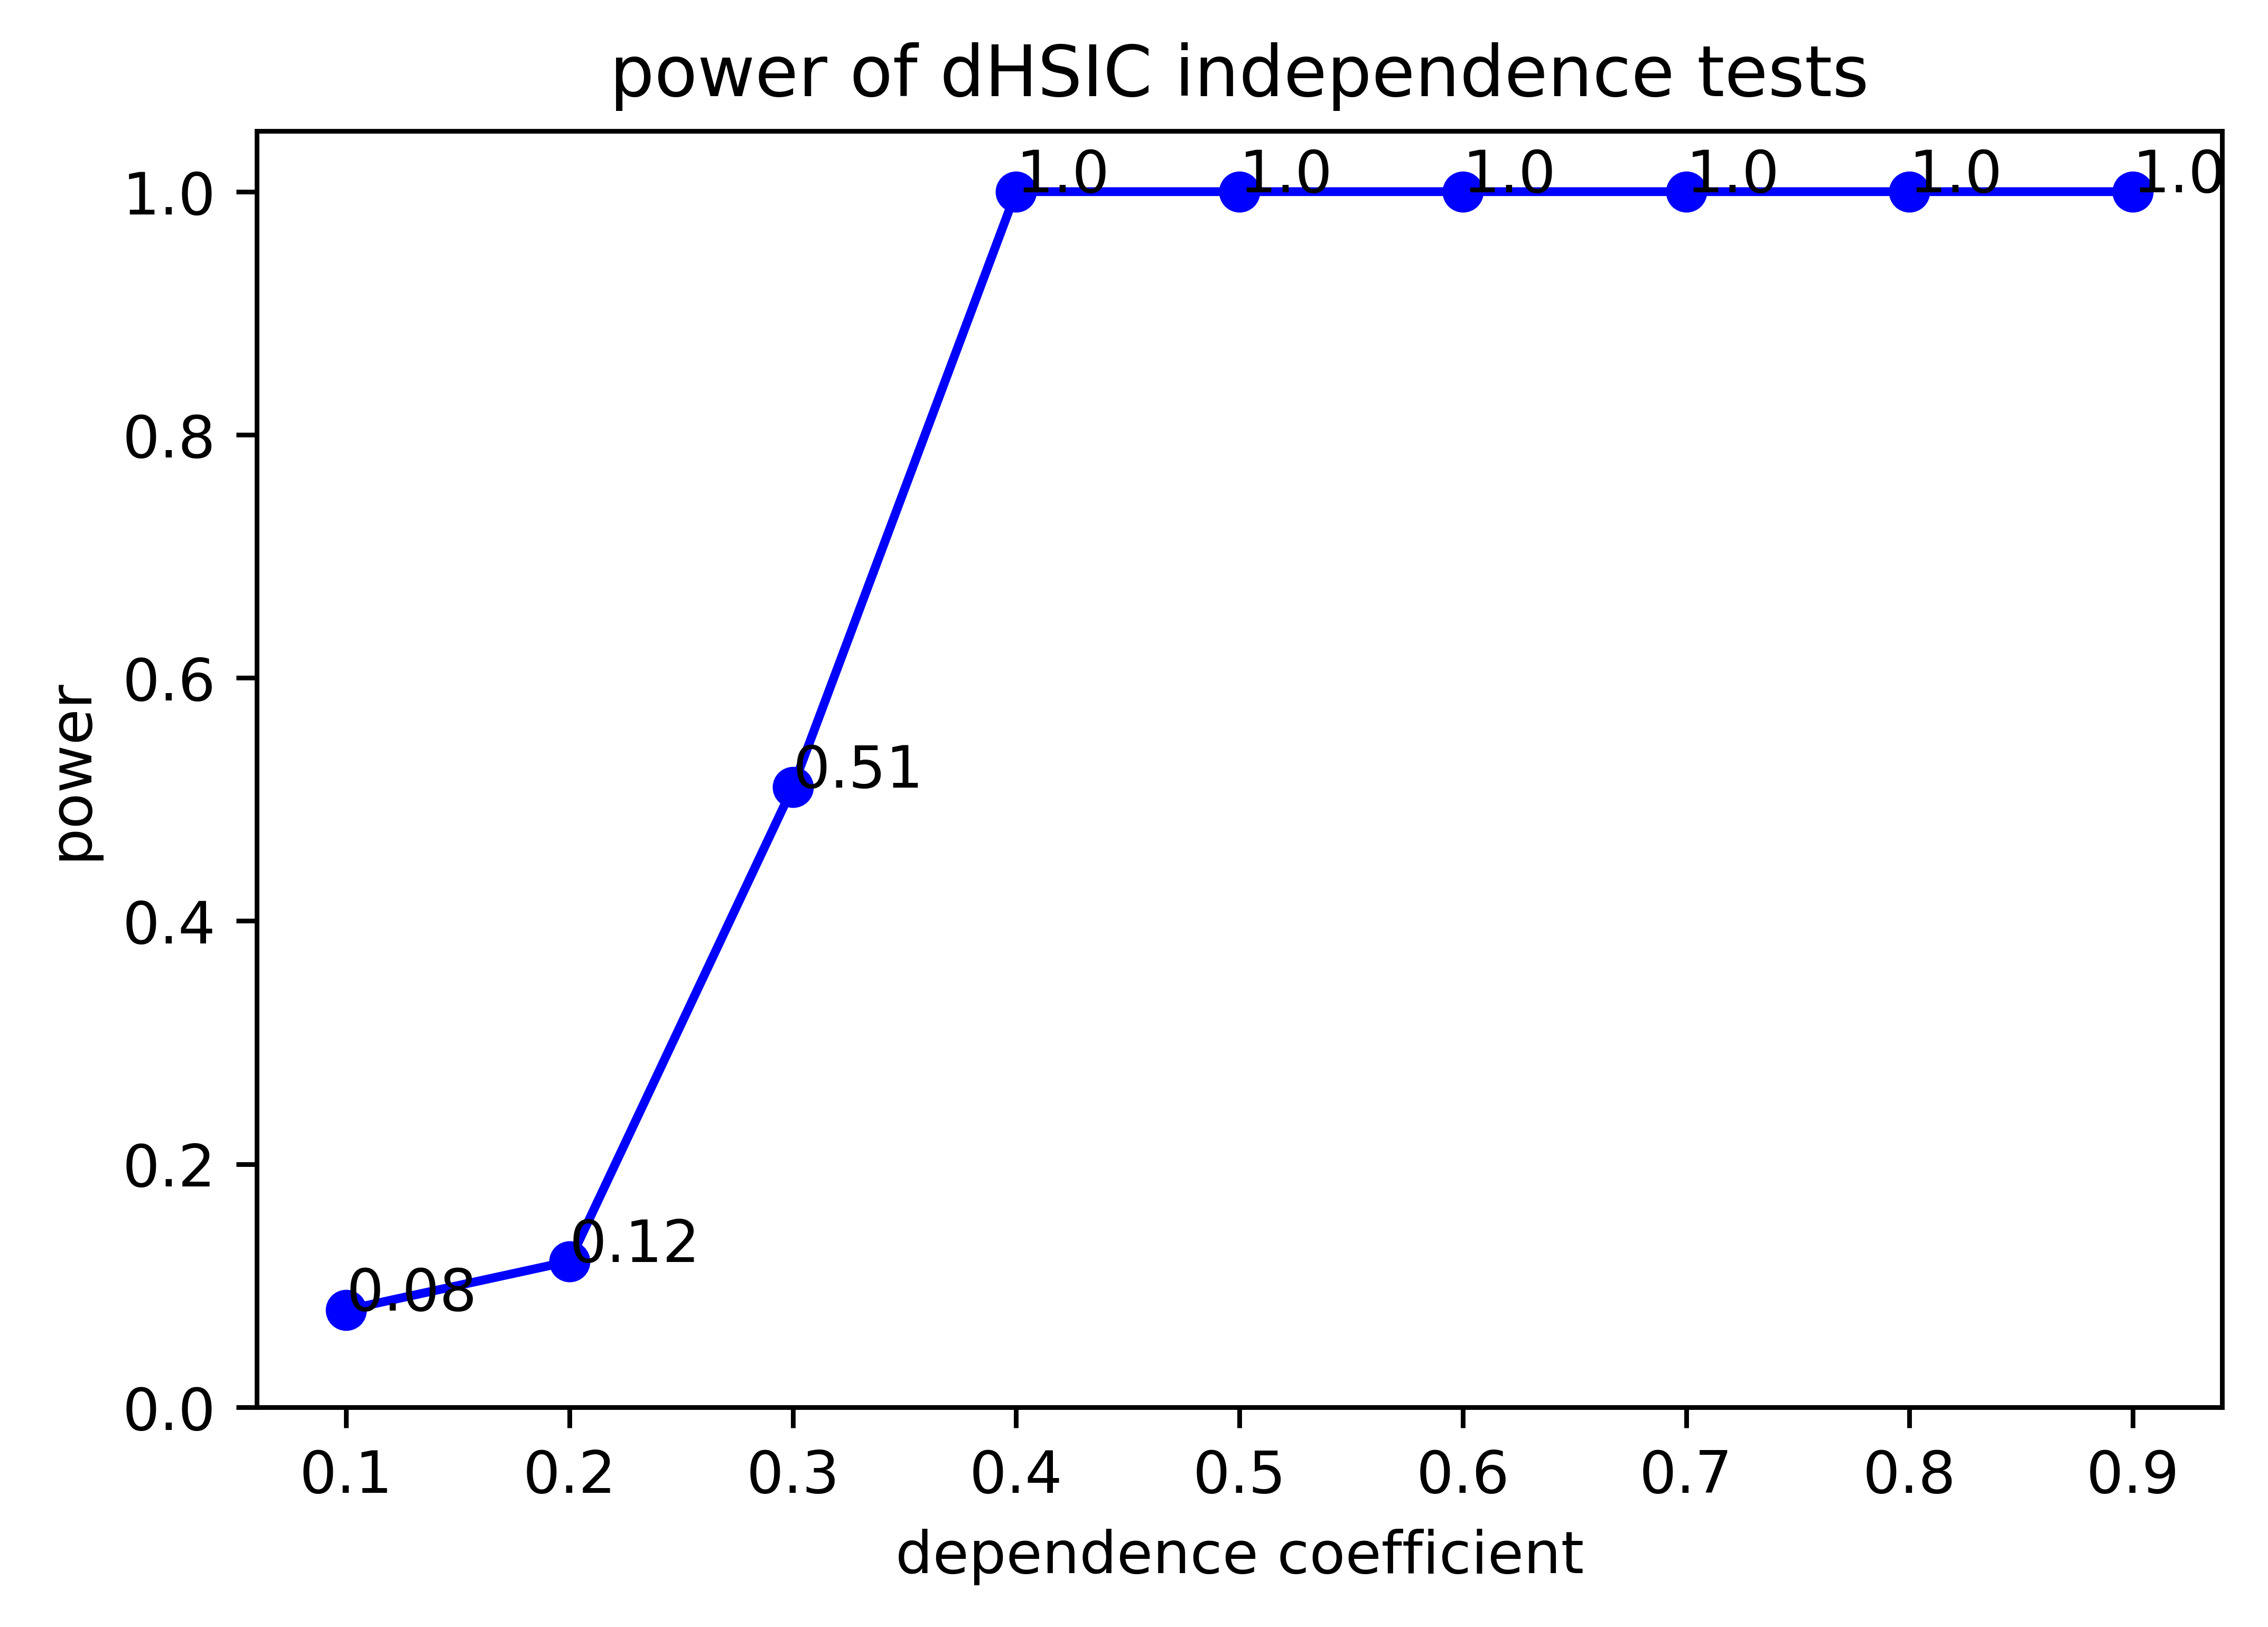

In [28]:
plot_test(list(power3.values()), 'power')

# normalisation and standardisation

In [86]:
def plot_cor(data, mode):
    x = np.arange(0.1, 1, 0.05)
    y = np.array(data)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    # ax.set_ylim(0, 1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode)
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

In [87]:
from HOI.normalisation import dHcor2_std, dHcor2_norm

## 3way iid

In [192]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example('higher-order', s = s, n_sample=4000)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [193]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [194]:
np.array(cor_s)/ np.array(cor_n)

array([7.5       , 5.33333333, 6.        , 5.25      , 5.83333333,
       5.625     , 5.5       , 5.85714286, 5.61111111, 5.4516129 ,
       5.43478261, 5.31147541, 5.15625   , 4.89230769, 4.63690476,
       4.38164251, 4.18025751, 5.33333333])

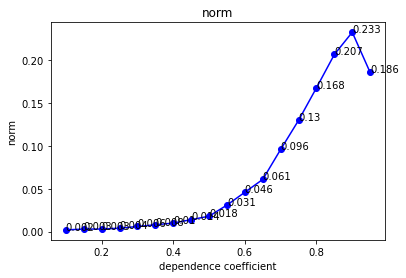

In [195]:
plot_cor(cor_n, 'norm')

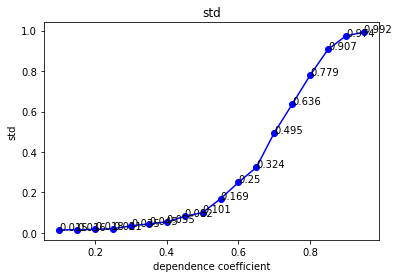

In [196]:
plot_cor(cor_s, 'std')

In [166]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example('multi-normal', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [167]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [168]:
np.array(cor_s)/ np.array(cor_n)

array([6.        , 6.        , 6.        , 6.16666667, 5.9375    ,
       6.03225806, 5.98947368, 5.86330935, 5.928     , 5.88383838,
       5.93665158, 5.99583333, 5.89538462, 5.90454545, 6.08148148,
       5.76053963, 5.82763975, 5.94355828])

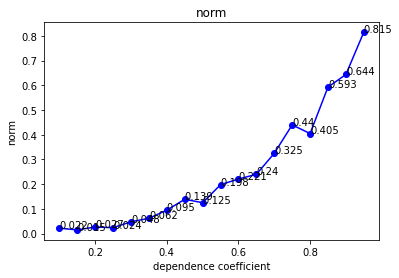

In [169]:
plot_cor(cor_n, 'norm')

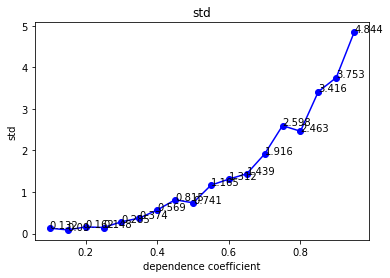

In [170]:
plot_cor(cor_s, 'std')

In [171]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example('interpolated', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [172]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [173]:
np.array(cor_s)/ np.array(cor_n)

array([6.        , 6.25      , 5.9       , 6.14285714, 5.72727273,
       5.9047619 , 5.93055556, 5.94915254, 5.96296296, 6.08376963,
       6.032     , 5.98314607, 5.77580071, 6.04092527, 6.12313938,
       5.90285714, 5.8980021 , 5.70980789])

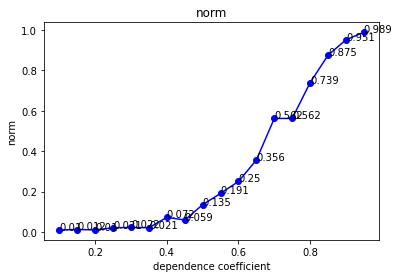

In [174]:
plot_cor(cor_n, 'norm')

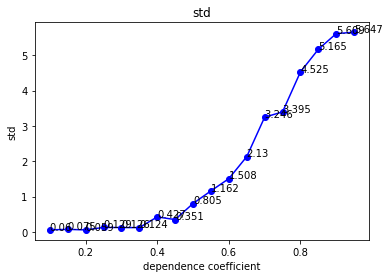

In [175]:
plot_cor(cor_s, 'std')

## 4way iid

In [176]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example_4way('higher-order', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [177]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [178]:
np.array(cor_s)/ np.array(cor_n)

array([5.8       , 5.76923077, 6.        , 5.66666667, 5.55555556,
       5.44444444, 5.9       , 5.61111111, 5.5       , 5.8       ,
       5.16666667, 5.1       , 4.75      , 4.9       , 4.77777778,
       4.        , 4.        , 3.        ])

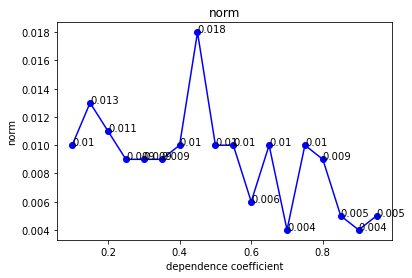

In [179]:
plot_cor(cor_n, 'norm')

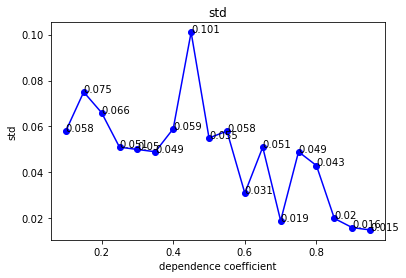

In [180]:
plot_cor(cor_s, 'std')

In [181]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example_4way('multi-normal', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [182]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [184]:
np.array(cor_s)/ np.array(cor_n)

array([5.83333333, 5.93333333, 5.82857143, 5.88      , 5.89285714,
       6.10344828, 5.89655172, 5.87128713, 5.87596899, 5.9125    ,
       6.02061856, 5.995     , 5.9704797 , 5.81384248, 5.83702213,
       6.02772643, 5.9186747 , 6.10526316])

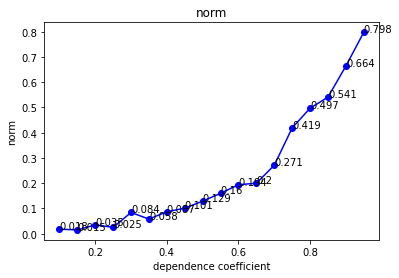

In [185]:
plot_cor(cor_n, 'norm')

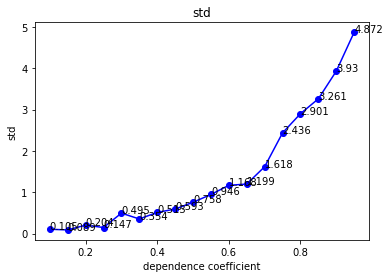

In [186]:
plot_cor(cor_s, 'std')

In [187]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = make_iid_example_4way('interpolated', s = s, n_sample=300)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [188]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [191]:
np.array(cor_s)/ np.array(cor_n)

array([5.77777778, 6.04545455, 5.85714286, 6.        , 5.75      ,
       5.86842105, 5.875     , 5.94736842, 6.11029412, 5.99086758,
       5.82857143, 5.88778055, 5.82026769, 5.72932331, 5.79768041,
       6.34309133, 5.81118143, 5.84919028])

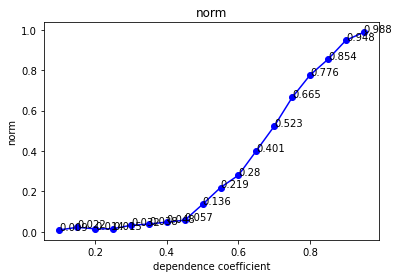

In [189]:
plot_cor(cor_n, 'norm')

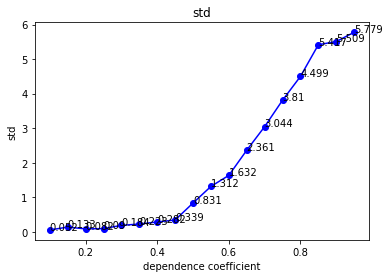

In [190]:
plot_cor(cor_s, 'std')